<a href="https://colab.research.google.com/github/santhoshsrivi/BITS/blob/main/ML_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sb
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn import linear_model
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<h1>Data Description</h1>

<h1>EDA</h1>

In [2]:
#We are reading the dataset into a dataframe by using pandas

dataset=pd.read_csv('AirfoilSelfNoise.csv')

In [3]:
#We are displaying the top 10 rows of the dataset just to do a sanity check if all 
#the required features were correctly read into the datafrane

dataset.head(10)

,f,alpha,c,U_infinity,delta,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
5,2500,0.0,0.3048,71.3,0.002663,125.571
6,3150,0.0,0.3048,71.3,0.002663,125.201
7,4000,0.0,0.3048,71.3,0.002663,123.061
8,5000,0.0,0.3048,71.3,0.002663,121.301
9,6300,0.0,0.3048,71.3,0.002663,119.541


In [4]:
#In this step, we want to know the number of data samples and the number of features(including the dependant feature). So there are 1503 data samples provided to us for analysis and 6 features 
#including the dependant variable

dataset.shape

(1503, 6)

In [5]:
#Now Before we do a univariate and multivariate data analysis, we want to drop the duplicate samples if any

dataset=dataset.drop_duplicates()

In [6]:
#After we have dropped the duplicates we want to see the number of data samples. In this case we observe that the number of data samples are same even after removing the duplicates which clearly 
#indicates that there were no duplicates in the dataset

dataset.shape

(1503, 6)

In [7]:
#In this step we see the datatype of each column and also see that there is no missing values. Also in the below there is another 
#way to check if there are missing values

#Also another observation is that there is no categorical variable and so no need to do the one hot encoding

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   f           1503 non-null   int64  
 1   alpha       1503 non-null   float64
 2   c           1503 non-null   float64
 3   U_infinity  1503 non-null   float64
 4   delta       1503 non-null   float64
 5   SSPL        1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 82.2 KB


In [8]:
#This step is a part of univariate analysis since we are finding the mean, standard deviation, other metrics like percentile. 
#From this step and also from the data analysis we conclude the follows-:

#1)For the first column f we see that mean is 2886 but maximum value is 20000 which implies that there might be some outliers which we may have to treat
#2)For the first column alpha we see that mean is 6.7 but maximum value is 22 which implies that there might be some outliers which we may have to treat
#3)Also since in almost all variables the mean is more than median, the features are likely to be right skwed
dataset.describe()

,f,alpha,c,U_infinity,delta,SSPL
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


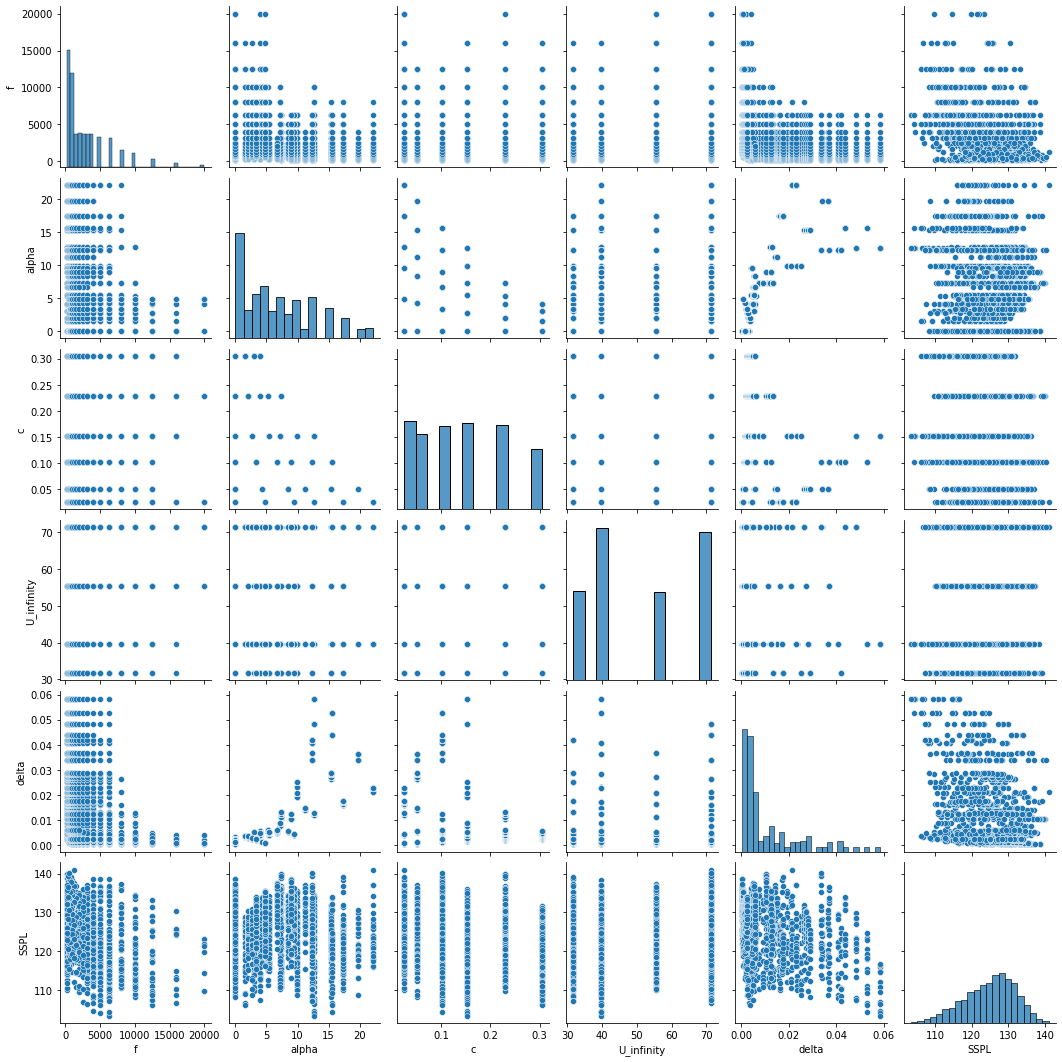

In [9]:
#In this step, we want to understand the distribution of each variable with other variable. Here we see that alpha and delta are highly positively co-related 
#positively co-related. But however to decide the amount of co-relation, we have used a heat map visualization below to quantify the co-relation

sb.pairplot(dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


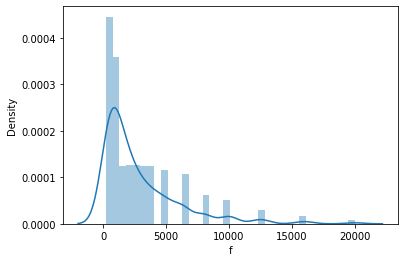

In [10]:
#In the next series of cell, we want to check the univariate distribution of data for each columns.

#In this step we are checking for distribution of f and it shows that it is approximately 
#right skwed. 

sb.distplot(dataset['f'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


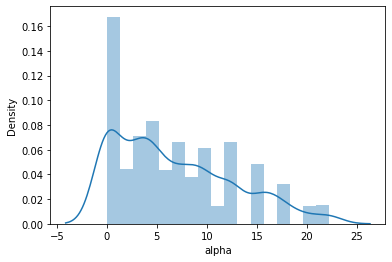

In [11]:
sb.distplot(dataset['alpha'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


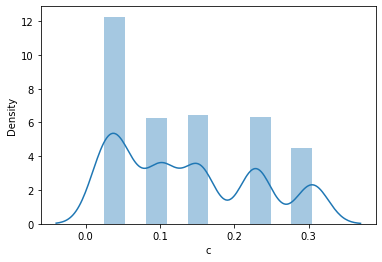

In [ ]:
sb.distplot(dataset['c'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


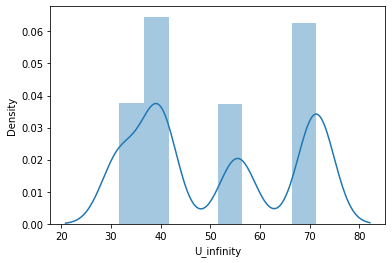

In [ ]:
sb.distplot(dataset['U_infinity'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


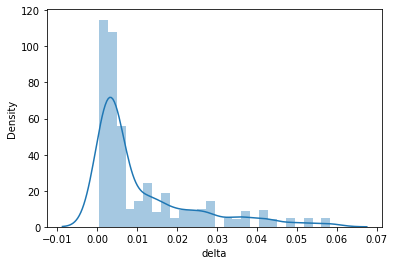

In [ ]:
sb.distplot(dataset['delta'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


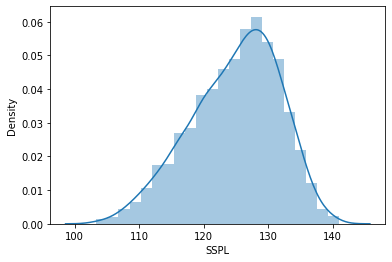

In [ ]:
sb.distplot(dataset['SSPL'])

In [ ]:
#Here we check if there are any missing values. Since the sum is 0 everywhere, looks like there are no missing values

dataset.isnull().sum()

f             0
alpha         0
c             0
U_infinity    0
delta         0
SSPL          0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


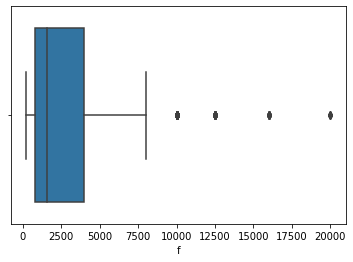

In [ ]:
#Here we will check if any of the features have outliers. From the output of the next cells, it looks 
#like all the features except C, u_infinity have outliers

sb.boxplot(dataset['f'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


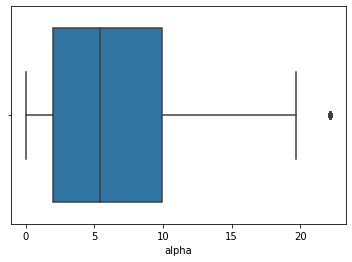

In [ ]:
sb.boxplot(dataset['alpha'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


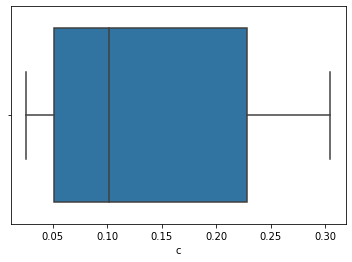

In [ ]:
sb.boxplot(dataset['c'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


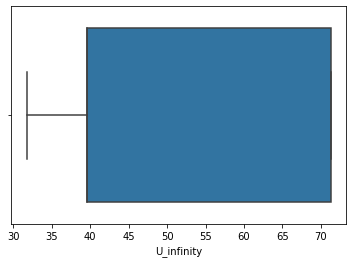

In [ ]:
sb.boxplot(dataset['U_infinity'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


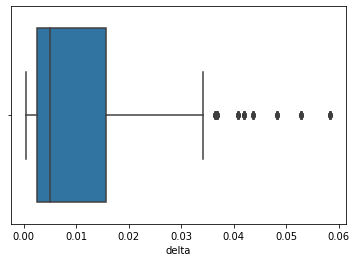

In [ ]:
sb.boxplot(dataset['delta'])

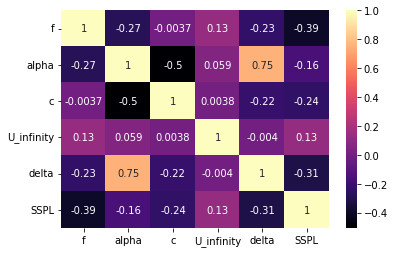

In [ ]:
#Here we want to test the co-relation between each pair of variables by plotting a heat map. Here we see that alpha and delta are highly positively co-related 
#with a co-relation of 0.75. There may be other co-relations as well but we will consider all those values >0.5 and <-0.5 as 
#highly positively co-related and highly negatively co-related respectively. So in the data pre-processing part, we will explore the possibility where we can exclude either alpha or delta
#but the final decision depends on the statistical evidence

sb.heatmap(dataset.corr(),annot=True,cmap='magma')

In [ ]:
#In the previous step we have tested the co-relation between each pair of variables but that still does not help us identify multi collinearity
#which means that an variable can be a linear combination of more than 1 variable. So the VIF helps us identify the independant variables 
#that can be a very close approximation of a linear combination of more than 1 independant variable. We consider the threshold to be 5
#.if VIF is more than 5, then we remove certain such variables. In the below we have 2 variables where VIF is > 5.
#So in the pre-processing we will explore the pssibility where we can exclude U_infinity but the final decision will depend on the statistical evidence


X = dataset[['f', 'alpha', 'c','U_infinity','delta']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,feature,VIF
0,f,1.942627
1,alpha,6.557489
2,c,3.254447
3,U_infinity,7.148723
4,delta,4.299617


Conclusions of Exploratory data Analysis

1) outlier treatment is important for columns as some of the columns have outliers

2) Missing value treatment is not required since there are no missing values

3) One hot encoding is not required as there are no categorical variables

4) Almost all the features are right skewed. Though we have this insight there is nothing we are going to do with this insight. However the target variable SSPL is left skewed

5) Alpha and Delta have a high positive co-relation of 0.75. So one of these can be a candidate for excluding which we will decide in the feature selection stage using statistical metrics like adjusted R squared and p-value

6) U_Infinity has a high VIF of 7.14. So it might be a possible feature to exclude which we will decide in feature selection stage using statistical metrics like adjusted R squared and p-value


So above are some of the insights. 

<h1>Data Pre-Processing</h1>

Data pre-Processing is a very important step because the data has to be as clean as possible so that our model can produce reliable results. following are the steps which we do in Data Pre-processing

1) Outlier treatment using IQR technique. in this case it is required

2) Missing Value treatment. This is not required in this case

3) One hot encoding to treat categorical variables. This is not required in this case

4) We need to scale all our features so that one feature is not dominant over other just because of its numerical magnitude. For this purpose many scalers are available. However we will use the min-max scaler here



In [12]:
#Here we perform the outlier treatment by replacing the outliers with either Q3+ 1.5 * IQR or Q1 - 1.5 * IQR . 

Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
lower_limit=Q1-(1.5 * IQR)
upper_limit=Q3+(1.5 * IQR)
dataset.loc[dataset['f'] > upper_limit['f'],'f']=upper_limit['f']
dataset.loc[dataset['f'] < lower_limit['f'],'f']=lower_limit['f']


dataset.loc[dataset['alpha'] > upper_limit['alpha'],'alpha']=upper_limit['alpha']
dataset.loc[dataset['alpha'] < lower_limit['alpha'],'alpha']=lower_limit['alpha']


dataset.loc[dataset['c'] > upper_limit['c'],'c']=upper_limit['c']
dataset.loc[dataset['c'] < lower_limit['c'],'c']=lower_limit['c']


dataset.loc[dataset['U_infinity'] > upper_limit['U_infinity'],'U_infinity']=upper_limit['U_infinity']
dataset.loc[dataset['U_infinity'] < lower_limit['U_infinity'],'U_infinity']=lower_limit['U_infinity']


dataset.loc[dataset['delta'] > upper_limit['delta'],'delta']=upper_limit['delta']
dataset.loc[dataset['delta'] < lower_limit['delta'],'delta']=lower_limit['delta']

In [13]:
#Here we are scaling all the variables between 0 and 1 by using a min-max scaler

min_max_scaler = MinMaxScaler()
dataset[["f", "alpha","c","U_infinity","delta","SSPL"]] = min_max_scaler.fit_transform(dataset[["f", "alpha","c","U_infinity","delta","SSPL"]])


In [14]:
#Here we are removing the feature alpha as decided during the EDA phase due to high VIF and high postive co-relation with delta

dataset=dataset[["f","alpha", "c","U_infinity","delta","SSPL"]]

In [15]:
dataset

,f,alpha,c,U_infinity,delta,SSPL
0,0.069767,0.000000,1.000000,1.000000,0.065139,0.606829
1,0.093023,0.000000,1.000000,1.000000,0.065139,0.580238
2,0.122093,0.000000,1.000000,1.000000,0.065139,0.600181
3,0.162791,0.000000,1.000000,1.000000,0.065139,0.643790
4,0.209302,0.000000,1.000000,1.000000,0.065139,0.640333
...,...,...,...,...,...,...
1498,0.267442,0.717241,0.272727,0.199495,1.000000,0.183051
1499,0.343023,0.717241,0.272727,0.199495,1.000000,0.156194
1500,0.441860,0.717241,0.272727,0.199495,1.000000,0.085729
1501,0.558140,0.717241,0.272727,0.199495,1.000000,0.075624


<h1>Feature Selection</h1>

In [ ]:
X_dataset=dataset[["f", "c","delta"]]
Y_dataset=dataset[["SSPL"]]
X_dataset = sm.add_constant(X_dataset)

model = sm.OLS(Y_dataset, X_dataset).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   SSPL   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     424.5
Date:                Sat, 25 Dec 2021   Prob (F-statistic):          1.40e-199
Time:                        19:49:31   Log-Likelihood:                 878.87
No. Observations:                1503   AIC:                            -1750.
Df Residuals:                    1499   BIC:                            -1728.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8346      0.008     99.352      0.000       0.818       0.851
f             -0.3428      0.012    -27.705      0.000      -0.367      -0.319
c             -0.2003      0.011    -18.567      0.000      -0.221      -0.179
delta         -0.2990      0.012    -25.305      0.000      -0.322      -0.276
==============================================================================
Omnibus:                       34.450   Durbin-Watson:                   0.349
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.806
Skew:                          -0.164   Prob(JB):                     6.25e-14
Kurtosis:                       3.929   Cond. No.                         5.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X_dataset=dataset[["f","alpha", "c"]]
Y_dataset=dataset[["SSPL"]]
X_dataset = sm.add_constant(X_dataset)

model = sm.OLS(Y_dataset, X_dataset).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   SSPL   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     415.5
Date:                Sat, 25 Dec 2021   Prob (F-statistic):          2.14e-196
Time:                        19:49:37   Log-Likelihood:                 871.51
No. Observations:                1503   AIC:                            -1735.
Df Residuals:                    1499   BIC:                            -1714.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9118      0.011     84.716      0.000       0.891       0.933
f             -0.3607      0.013    -28.510      0.000      -0.386      -0.336
alpha         -0.3925      0.016    -24.890      0.000      -0.423      -0.362
c             -0.2887      0.012    -23.510      0.000      -0.313      -0.265
==============================================================================
Omnibus:                       13.363   Durbin-Watson:                   0.346
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.182
Skew:                          -0.140   Prob(JB):                     0.000306
Kurtosis:                       3.424   Cond. No.                         6.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X_dataset=dataset[["f","alpha", "c","delta"]]
Y_dataset=dataset[["SSPL"]]
X_dataset = sm.add_constant(X_dataset)

model = sm.OLS(Y_dataset, X_dataset).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   SSPL   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     346.4
Date:                Sat, 25 Dec 2021   Prob (F-statistic):          3.39e-211
Time:                        19:49:40   Log-Likelihood:                 908.87
No. Observations:                1503   AIC:                            -1808.
Df Residuals:                    1498   BIC:                            -1781.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8893      0.011     82.245      0.000       0.868       0.911
f             -0.3606      0.012    -29.212      0.000      -0.385      -0.336
alpha         -0.2058      0.026     -7.811      0.000      -0.257      -0.154
c             -0.2540      0.013    -20.131      0.000      -0.279      -0.229
delta         -0.1733      0.020     -8.738      0.000      -0.212      -0.134
==============================================================================
Omnibus:                       24.231   Durbin-Watson:                   0.365
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.431
Skew:                          -0.142   Prob(JB):                     7.45e-09
Kurtosis:                       3.719   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X_dataset=dataset[["f", "c","U_infinity","delta"]]
Y_dataset=dataset[["SSPL"]]
X_dataset = sm.add_constant(X_dataset)

model = sm.OLS(Y_dataset, X_dataset).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   SSPL   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     371.8
Date:                Sat, 25 Dec 2021   Prob (F-statistic):          1.82e-222
Time:                        19:49:42   Log-Likelihood:                 934.94
No. Observations:                1503   AIC:                            -1860.
Df Residuals:                    1498   BIC:                            -1833.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7966      0.009     90.207      0.000       0.779       0.814
f             -0.3590      0.012    -29.868      0.000      -0.383      -0.335
c             -0.2019      0.010    -19.423      0.000      -0.222      -0.182
U_infinity     0.0927      0.009     10.773      0.000       0.076       0.110
delta         -0.3043      0.011    -26.704      0.000      -0.327      -0.282
==============================================================================
Omnibus:                       49.535   Durbin-Watson:                   0.364
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.384
Skew:                          -0.208   Prob(JB):                     2.62e-22
Kurtosis:                       4.189   Cond. No.                         5.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X_dataset=dataset[["f","alpha","c","U_infinity"]]
Y_dataset=dataset[["SSPL"]]
X_dataset = sm.add_constant(X_dataset)

model = sm.OLS(Y_dataset, X_dataset).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   SSPL   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     386.1
Date:                Sat, 25 Dec 2021   Prob (F-statistic):          1.35e-228
Time:                        19:49:44   Log-Likelihood:                 949.12
No. Observations:                1503   AIC:                            -1888.
Df Residuals:                    1498   BIC:                            -1862.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8760      0.011     82.620      0.000       0.855       0.897
f             -0.3836      0.012    -31.565      0.000      -0.407      -0.360
alpha         -0.4144      0.015    -27.481      0.000      -0.444      -0.385
c             -0.2980      0.012    -25.499      0.000      -0.321      -0.275
U_infinity     0.1094      0.009     12.766      0.000       0.093       0.126
==============================================================================
Omnibus:                       16.932   Durbin-Watson:                   0.372
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.139
Skew:                          -0.129   Prob(JB):                     9.45e-06
Kurtosis:                       3.551   Cond. No.                         7.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The conclusion of the feature selection is that out of all 5 combinations, combination 5 is giving the highest adjusted R squared and in all combinations p-value is always 0 which means that null hypothesis can always be rejected here and all the variables are important. However out of all combinations we will go with combination 5 which is showing the highest adjusted R squared. So delta is column which we will exclude while building the model

<h1>Building The Model and Evaluation</h1>

As a first step, we eliminate the feature delta as per the statistical evidence in the previous step

Then we apply 3 models using scikit learn. 

The first one is the linear Regression Using Least Squares which would give a closed form solution

The 2nd model is the ridge regression which is regression with ridge regularization used. This uses gradient descent

The 3rd model is the lasso regression which is regression with lasso regularization used. This uses gradient descent

We have experimented the above 3 models with the following values of train test split

80-20
70-30
90-10


For ridge regression and lasso regression we are considering the maximum number of iterations as 100000. We have experimented other values as well and this is optimal. As in we started with 1000 iterations and kept increasing slightly it which was leading to the reduction of RMSE as expected. However beyond 100000, there was no change 

For ridge regression and lasso regression, we have taken the regularization parameter as 0.00000000000001. We have experimented with other values and finally arrived at it as we found it to be optimal




In [ ]:
#Here we are eliminating the column delta as per the statistical evidence in the previous step

X_dataset=dataset[["f","alpha", "c","U_infinity"]]
Y_dataset=dataset[["SSPL"]]

In [ ]:
X_dataset_train,X_dataset_test,Y_dataset_train,Y_dataset_test=train_test_split(X_dataset,Y_dataset,train_size=0.7,random_state=3)

OLS = LinearRegression()
OLS_model=OLS.fit(X_dataset_train,Y_dataset_train)
Y_dataset_predict_OLS=OLS_model.predict(X_dataset_test)

print('Mean Absolute Error for Ordinary least square regression without regularization:', metrics.mean_absolute_error(Y_dataset_test, Y_dataset_predict_OLS))  
print('Mean Squared Error for Ordinary least square regression without regularization:', metrics.mean_squared_error(Y_dataset_test,Y_dataset_predict_OLS))  
print('Root Mean Squared Error for Ordinary least square regression without regularization:', np.sqrt(metrics.mean_squared_error(Y_dataset_test, Y_dataset_predict_OLS)))
print(pd.concat([pd.DataFrame(X_dataset.columns),pd.DataFrame(np.transpose(OLS_model.coef_))], axis = 1))
print('intercept is ')
print( OLS_model.intercept_)
print('\n\n\n')
ridge_model = Ridge(alpha=0.00000000000001,max_iter=100000)
Ridge_regression_model=ridge_model.fit(X_dataset_train,Y_dataset_train)
Y_dataset_predict_Ridge=Ridge_regression_model.predict(X_dataset_test)

print('Mean Absolute Error for linear regression with ridge regularization:', metrics.mean_absolute_error(Y_dataset_test, Y_dataset_predict_Ridge))  
print('Mean Squared Error for linear regression with ridge regularization:', metrics.mean_squared_error(Y_dataset_test,Y_dataset_predict_Ridge))  
print('Root Mean Squared Error for linear regression with ridge regularization:', np.sqrt(metrics.mean_squared_error(Y_dataset_test, Y_dataset_predict_Ridge)))
print(pd.concat([pd.DataFrame(X_dataset.columns),pd.DataFrame(np.transpose(Ridge_regression_model.coef_))], axis = 1))
print('intercept is ')
print( OLS_model.intercept_)
print('\n\n\n')
lasso_model = linear_model.Lasso(alpha=0.00000000000001,max_iter=100000)
lasso_regression_model=lasso_model.fit(X_dataset_train,Y_dataset_train)
Y_dataset_predict_lasso=lasso_regression_model.predict(X_dataset_test)

print('Mean Absolute Error for linear regression with lasso regularization:', metrics.mean_absolute_error(Y_dataset_test, Y_dataset_predict_lasso))  
print('Mean Squared Error for linear regression with lasso regularization:', metrics.mean_squared_error(Y_dataset_test,Y_dataset_predict_lasso))  
print('Root Mean Squared Error for linear regression with lasso regularization:', np.sqrt(metrics.mean_squared_error(Y_dataset_test, Y_dataset_predict_lasso)))
print(pd.concat([pd.DataFrame(X_dataset.columns),pd.DataFrame(np.transpose(lasso_regression_model.coef_))], axis = 1))
print('intercept is ')
print(lasso_regression_model.intercept_)

Mean Absolute Error for Ordinary least square regression without regularization: 0.09923913767298431
Mean Squared Error for Ordinary least square regression without regularization: 0.016560954326038473
Root Mean Squared Error for Ordinary least square regression without regularization: 0.1286893714571583
            0         0
0           f -0.387041
1       alpha -0.413187
2           c -0.290882
3  U_infinity  0.122486
intercept is 
[0.86157219]




Mean Absolute Error for linear regression with ridge regularization: 0.09923913767298434
Mean Squared Error for linear regression with ridge regularization: 0.01656095432603848
Root Mean Squared Error for linear regression with ridge regularization: 0.12868937145715834
            0         0
0           f -0.387041
1       alpha -0.413187
2           c -0.290882
3  U_infinity  0.122486
intercept is 
[0.86157219]




Mean Absolute Error for linear regression with lasso regularization: 0.09923913767299301
Mean Squared Error for linear reg

In [ ]:
X_dataset_train,X_dataset_test,Y_dataset_train,Y_dataset_test=train_test_split(X_dataset,Y_dataset,train_size=0.8,random_state=3)

OLS = LinearRegression()
OLS_model=OLS.fit(X_dataset_train,Y_dataset_train)
Y_dataset_predict_OLS=OLS_model.predict(X_dataset_test)

print('Mean Absolute Error for Ordinary least square regression without regularization:', metrics.mean_absolute_error(Y_dataset_test, Y_dataset_predict_OLS))  
print('Mean Squared Error for Ordinary least square regression without regularization:', metrics.mean_squared_error(Y_dataset_test,Y_dataset_predict_OLS))  
print('Root Mean Squared Error for Ordinary least square regression without regularization:', np.sqrt(metrics.mean_squared_error(Y_dataset_test, Y_dataset_predict_OLS)))
print(pd.concat([pd.DataFrame(X_dataset.columns),pd.DataFrame(np.transpose(OLS_model.coef_))], axis = 1))
print('intercept is ')
print( OLS_model.intercept_)
print('\n\n\n')
ridge_model = Ridge(alpha=0.00000000000001,max_iter=100000)
Ridge_regression_model=ridge_model.fit(X_dataset_train,Y_dataset_train)
Y_dataset_predict_Ridge=Ridge_regression_model.predict(X_dataset_test)

print('Mean Absolute Error for linear regression with ridge regularization:', metrics.mean_absolute_error(Y_dataset_test, Y_dataset_predict_Ridge))  
print('Mean Squared Error for linear regression with ridge regularization:', metrics.mean_squared_error(Y_dataset_test,Y_dataset_predict_Ridge))  
print('Root Mean Squared Error for linear regression with ridge regularization:', np.sqrt(metrics.mean_squared_error(Y_dataset_test, Y_dataset_predict_Ridge)))
print(pd.concat([pd.DataFrame(X_dataset.columns),pd.DataFrame(np.transpose(Ridge_regression_model.coef_))], axis = 1))
print('intercept is ')
print( OLS_model.intercept_)
print('\n\n\n')
lasso_model = linear_model.Lasso(alpha=0.00000000000001,max_iter=100000)
lasso_regression_model=lasso_model.fit(X_dataset_train,Y_dataset_train)
Y_dataset_predict_lasso=lasso_regression_model.predict(X_dataset_test)

print('Mean Absolute Error for linear regression with lasso regularization:', metrics.mean_absolute_error(Y_dataset_test, Y_dataset_predict_lasso))  
print('Mean Squared Error for linear regression with lasso regularization:', metrics.mean_squared_error(Y_dataset_test,Y_dataset_predict_lasso))  
print('Root Mean Squared Error for linear regression with lasso regularization:', np.sqrt(metrics.mean_squared_error(Y_dataset_test, Y_dataset_predict_lasso)))
print(pd.concat([pd.DataFrame(X_dataset.columns),pd.DataFrame(np.transpose(lasso_regression_model.coef_))], axis = 1))
print('intercept is ')
print(lasso_regression_model.intercept_)

Mean Absolute Error for Ordinary least square regression without regularization: 0.09624656735949712
Mean Squared Error for Ordinary least square regression without regularization: 0.014956939268900857
Root Mean Squared Error for Ordinary least square regression without regularization: 0.12229856609503179
            0         0
0           f -0.382614
1       alpha -0.403610
2           c -0.293672
3  U_infinity  0.116310
intercept is 
[0.86413243]




Mean Absolute Error for linear regression with ridge regularization: 0.09624656735949709
Mean Squared Error for linear regression with ridge regularization: 0.014956939268900854
Root Mean Squared Error for linear regression with ridge regularization: 0.12229856609503177
            0         0
0           f -0.382614
1       alpha -0.403610
2           c -0.293672
3  U_infinity  0.116310
intercept is 
[0.86413243]




Mean Absolute Error for linear regression with lasso regularization: 0.09624656735950829
Mean Squared Error for linear r

In [ ]:
X_dataset_train,X_dataset_test,Y_dataset_train,Y_dataset_test=train_test_split(X_dataset,Y_dataset,train_size=0.9,random_state=3)

OLS = LinearRegression()
OLS_model=OLS.fit(X_dataset_train,Y_dataset_train)
Y_dataset_predict_OLS=OLS_model.predict(X_dataset_test)

print('Mean Absolute Error for Ordinary least square regression without regularization:', metrics.mean_absolute_error(Y_dataset_test, Y_dataset_predict_OLS))  
print('Mean Squared Error for Ordinary least square regression without regularization:', metrics.mean_squared_error(Y_dataset_test,Y_dataset_predict_OLS))  
print('Root Mean Squared Error for Ordinary least square regression without regularization:', np.sqrt(metrics.mean_squared_error(Y_dataset_test, Y_dataset_predict_OLS)))
print(pd.concat([pd.DataFrame(X_dataset.columns),pd.DataFrame(np.transpose(OLS_model.coef_))], axis = 1))
print('intercept is ')
print( OLS_model.intercept_)
print('\n\n\n')
ridge_model = Ridge(alpha=0.00000000000001,max_iter=100000)
Ridge_regression_model=ridge_model.fit(X_dataset_train,Y_dataset_train)
Y_dataset_predict_Ridge=Ridge_regression_model.predict(X_dataset_test)

print('Mean Absolute Error for linear regression with ridge regularization:', metrics.mean_absolute_error(Y_dataset_test, Y_dataset_predict_Ridge))  
print('Mean Squared Error for linear regression with ridge regularization:', metrics.mean_squared_error(Y_dataset_test,Y_dataset_predict_Ridge))  
print('Root Mean Squared Error for linear regression with ridge regularization:', np.sqrt(metrics.mean_squared_error(Y_dataset_test, Y_dataset_predict_Ridge)))
print(pd.concat([pd.DataFrame(X_dataset.columns),pd.DataFrame(np.transpose(Ridge_regression_model.coef_))], axis = 1))
print('intercept is ')
print( OLS_model.intercept_)
print('\n\n\n')
lasso_model = linear_model.Lasso(alpha=0.00000000000001,max_iter=100000)
lasso_regression_model=lasso_model.fit(X_dataset_train,Y_dataset_train)
Y_dataset_predict_lasso=lasso_regression_model.predict(X_dataset_test)

print('Mean Absolute Error for linear regression with lasso regularization:', metrics.mean_absolute_error(Y_dataset_test, Y_dataset_predict_lasso))  
print('Mean Squared Error for linear regression with lasso regularization:', metrics.mean_squared_error(Y_dataset_test,Y_dataset_predict_lasso))  
print('Root Mean Squared Error for linear regression with lasso regularization:', np.sqrt(metrics.mean_squared_error(Y_dataset_test, Y_dataset_predict_lasso)))
print(pd.concat([pd.DataFrame(X_dataset.columns),pd.DataFrame(np.transpose(lasso_regression_model.coef_))], axis = 1))
print('intercept is ')
print(lasso_regression_model.intercept_)

Mean Absolute Error for Ordinary least square regression without regularization: 0.1011162601098929
Mean Squared Error for Ordinary least square regression without regularization: 0.01586350396236597
Root Mean Squared Error for Ordinary least square regression without regularization: 0.12595040278762895
            0         0
0           f -0.382576
1       alpha -0.406946
2           c -0.293634
3  U_infinity  0.112267
intercept is 
[0.87013003]




Mean Absolute Error for linear regression with ridge regularization: 0.10111626010989289
Mean Squared Error for linear regression with ridge regularization: 0.015863503962365966
Root Mean Squared Error for linear regression with ridge regularization: 0.12595040278762892
            0         0
0           f -0.382576
1       alpha -0.406946
2           c -0.293634
3  U_infinity  0.112267
intercept is 
[0.87013003]




Mean Absolute Error for linear regression with lasso regularization: 0.10111626010990604
Mean Squared Error for linear reg